# Uber Trips Analysis using Python

Uber has been a major source of travel for people living in urban areas. Some people don’t have their vehicles while some don’t drive their vehicles intentionally because of their busy schedule. So different kinds of people are using the services of Uber and other taxi services. In this article, I will take you through Uber trips analysis using Python.

## Uber Trips Analysis


By analyzing Uber trips, we can draw many patterns like which day has the highest and the lowest trips or the busiest hour for Uber and many other patterns. The dataset I’m using here is based on Uber trips from New York, a city with a very complex transportation system with a large residential community.

The dataset contains data of about 4.5 million uber pickups in New York City from April to September and 14.3 million pickups from January to June 2015. You can do so much more with this dataset rather than just analyzing it. But for now, in the section below, I will take you through Uber Trips analysis using Python.

### Import the necessary Python libraries & dataset


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import plotly.express as px

%matplotlib inline

## Import Data

In [48]:
data = pd.read_csv(r"./data/ubar.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)
data.head()

## Data Preprocessing

This data contains data about date and time, latitude and longitude, and a Base column that contains code affiliated with the uber pickup. You can get more datasets for the task of Uber trips analysis from Kaggle, for now, let’s prepare the data that I am using here to analyze the Uber trips according to days and hours

In [ ]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
 4   Day        1028136 non-null  int64         
 5   Weekday    1028136 non-null  int64         
 6   Hour       1028136 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 54.9+ MB


In [ ]:
data.describe()

,Lat,Lon,Day,Weekday,Hour
count,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01,1.555385e+01,2.961477e+00,1.409235e+01
std,4.082861e-02,5.831413e-02,8.448335e+00,1.942572e+00,5.971244e+00
min,3.998970e+01,-7.477360e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.072040e+01,-7.399620e+01,8.000000e+00,1.000000e+00,1.000000e+01
50%,4.074180e+01,-7.398310e+01,1.600000e+01,3.000000e+00,1.500000e+01
75%,4.076120e+01,-7.396280e+01,2.300000e+01,5.000000e+00,1.900000e+01
max,4.134760e+01,-7.271630e+01,3.000000e+01,6.000000e+00,2.300000e+01


In [ ]:
data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Day', 'Weekday', 'Hour'], dtype='object')

### Lets Check is there any Null values or Not in this dataset

In [ ]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
Day          0
Weekday      0
Hour         0
dtype: int64

So I have prepared this data according to the days and hours, as I am using the Uber trips for the September month so let’s have a look at each day to see on which day the Uber trips were highest

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

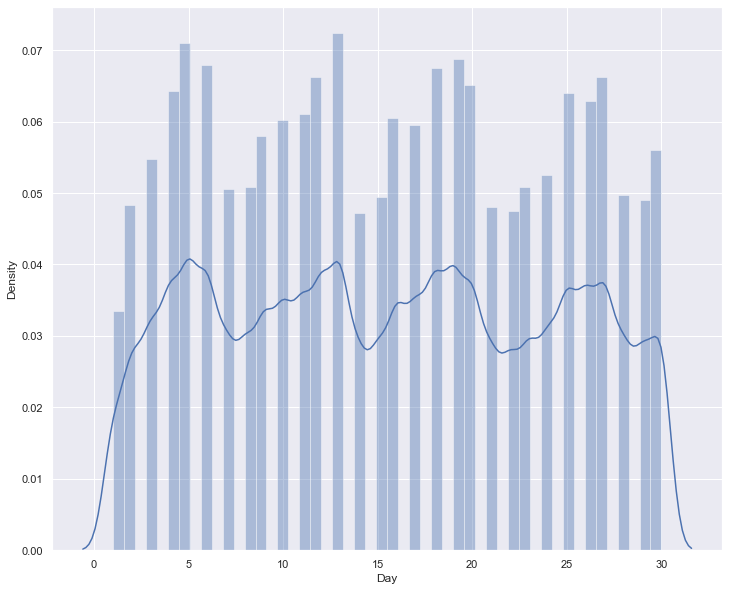

In [ ]:
sns.set(rc={"figure.figsize": (12,10)})
sns.distplot(data["Day"])

By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. Now let’s analyze the Uber trips according to the hours

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

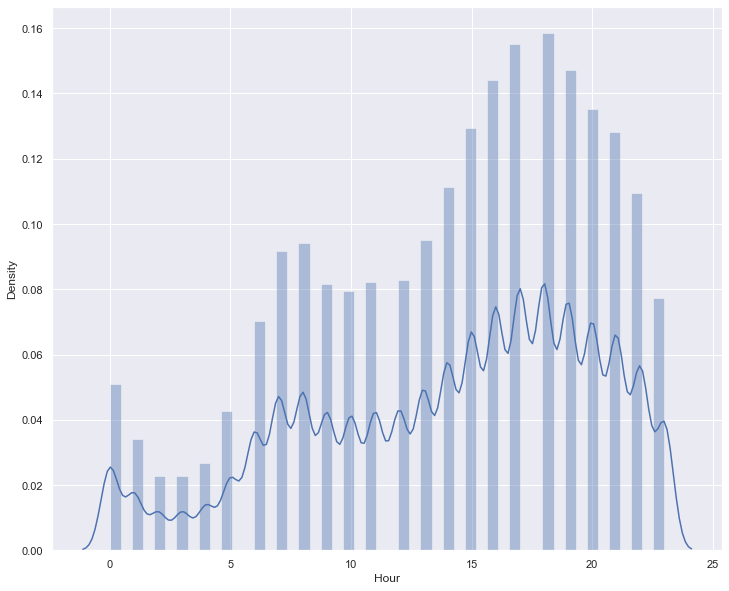

In [ ]:
sns.distplot(data["Hour"])

According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let’s analyze the Uber trips according to the weekdays

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

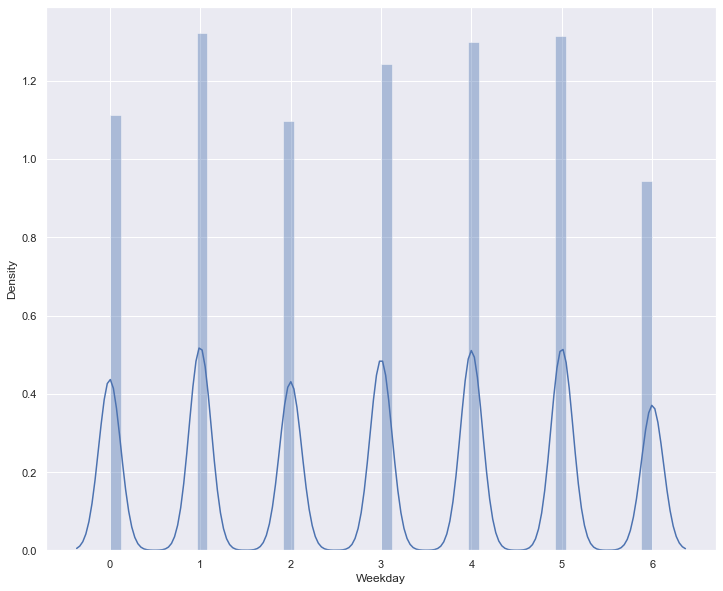

In [ ]:
sns.distplot(data["Weekday"])

In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest. Now let’s have a look at the correlation of hours and weekdays on the Uber trips

### Correlation of Weekday and Hour

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

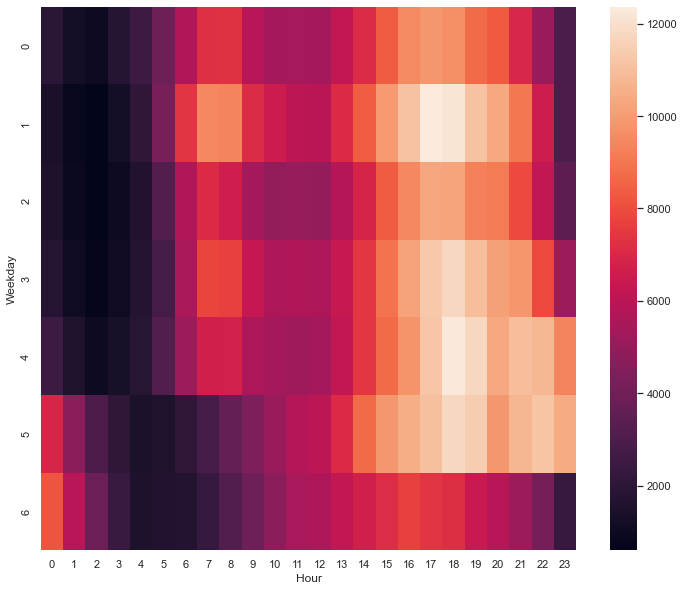

In [ ]:
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


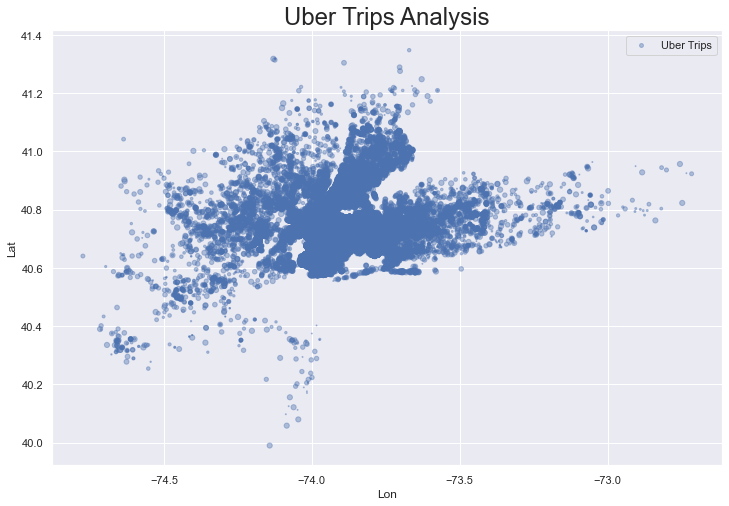

In [ ]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis", fontsize=24)
plt.legend()
plt.show()

## Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are

##### 1. Monday is the most profitable day for Uber
##### 2. On Saturdays less number of people use Uber
##### 3. 6 pm is the busiest day for Uber
##### 4. On average a rise in Uber trips start around 5 am.
##### 6. Most of the Uber trips originate near the Manhattan region in New York.

I hope you liked this article on Uber trips analysis using Python. Feel free to ask your valuable questions in the comments section below.

# Sheikh Rasel Ahmed

#### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast



##### LinkedIn - https://www.linkedin.com/in/shekhnirob1

##### GitHub - https://github.com/Rasel1435

##### Behance - https://www.behance.net/Shekhrasel2513